<a href="https://colab.research.google.com/github/khanh22mse23057/Semester2-DIP/blob/main/FSBMSE_%5BDigital_Image_and_Video_Processing%5D_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FSB#MSE11: Image and Video Processing**</br>
**CLASS : FSB-MSE11-2022**</br>
**MSHV : 22MSE23057**</br>
**STUDENT's NAME : TEAM 04**</br>
**INSTRUCTOR: NGUYEN NGOC TRUONG MINH**</br>


## Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [2]:

import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import urllib as URL
import requests
from io import BytesIO
from PIL import Image

%matplotlib inline


### Utilities

In [3]:
def im2double(imgPath, flag = 1):
   img = cv2.imread(imgPath, flag)
   if img is not None:
      img = img.astype(np.float32) # Divide all values by the largest possible value in the datatype
   return img 

In [4]:
def imshow(title, image):
  print(title)
  cv2_imshow(image)

# Check Image Information
def image_infor(image):
  # Check the image matrix data type (could know the bit depth of the image)
  print(image.dtype)
  # Check the height of image 
  print(image.shape[0])
  # Check the width of image 
  print(image.shape[1])
  # Check the number of channels of the image
  print(image.shape[2])


### Download input images

In [5]:
input_images = ['https://i.ibb.co/bQs0BG2/Ex1.jpg',
'https://i.ibb.co/Zhy9K5M/Ex2.jpg',
'https://i.ibb.co/qRJCzBY/Ex3.jpg',
'https://i.ibb.co/DLKXCNH/Ex4.jpg',
'https://i.ibb.co/p1hyY08/Ex5.jpg']


In [6]:
for url in input_images:
  !wget -P images -q {url}
!ls images

Ex1.jpg  Ex2.jpg  Ex3.jpg  Ex4.jpg  Ex5.jpg


In [7]:
# image = cv2.imread('./images/coins.png')
#image = im2double('./images/coins.png')

# Scale the image
# scaled_image = cv2.resize(image, None, fx=0.4, fy=0.4, interpolation=cv2.INTER_LINEAR)
# cv2_imshow(scaled_image)

# Phan Thuc Hanh

In [8]:
# grayImg  = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(grayImg)

# # Calculate the threshold using Otsu's method
# thresh, img_bw = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# cv2_imshow(img_bw)

## 1. (10 điểm) – Ảnh màu (Color Image) và Cân bằng ảnh màu (Color Image Equalization)
Cho ảnh màu JPG tên Ex1.jpg
(a) Hiển thị ảnh gốc và biểu đồ tần số (histogram) của ảnh gốc. </br>
(b) Áp dụng cân bằng biểu đồ tần số (histogram equalization) cho ảnh gốc. Hiển thị ảnh sau khi được </br>
cân bằng và biểu đồ tần số của nó. </br>

PYTHON CODE

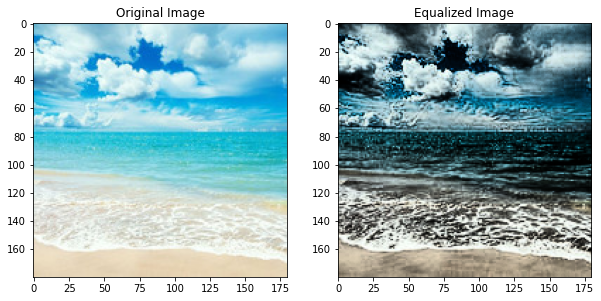

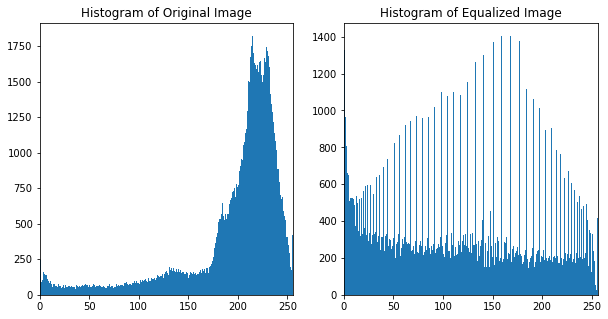

In [9]:
# Load the color image
img = cv2.imread('./images/Ex1.jpg')

# Convert the color image from RGB to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Separate the Hue, Saturation, and Value channels
h, s, v = cv2.split(hsv_img)

# Apply histogram equalization to the Value channel
equalized_v = cv2.equalizeHist(v)

# Merge the Hue, Saturation, and equalized Value channels
equalized_hsv_img = cv2.merge([h, s, equalized_v])

# Convert the image back to RGB color space
equalized_img = cv2.cvtColor(equalized_hsv_img, cv2.COLOR_HSV2BGR)

# Display the original and equalized images side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized Image')
plt.show()

# Plot the histograms before and after the transformation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(img.flatten(), 256, [0, 256])
plt.xlim([0,256])
plt.title('Histogram of Original Image')
plt.subplot(1,2,2)
plt.hist(equalized_img.flatten(), 256, [0, 256])
plt.xlim([0,256])
plt.title('Histogram of Equalized Image')
plt.show()

## 2. (15 điểm) – Phát hiện Đường biên (Edge Detection)
Cho ảnh màu JPG tên Ex2.jpg </br>
(a) Loại bỏ nhiễu khỏi ảnh gốc. Có thể áp dụng bất kỳ bộ lọc nào.  </br>
(b) Áp dụng các toán tử Prewitt, Sobel và Roberts để phát hiện các cạnh. Đối với mỗi trường hợp, hãy sử dụng ba giá trị ngưỡng khác nhau để minh họa các biến thể.  </br>
(c) Áp dụng bộ dò cạnh Canny với ba độ lệch chuẩn khác nhau σ = √2, 4√2 và 8√2  </br>

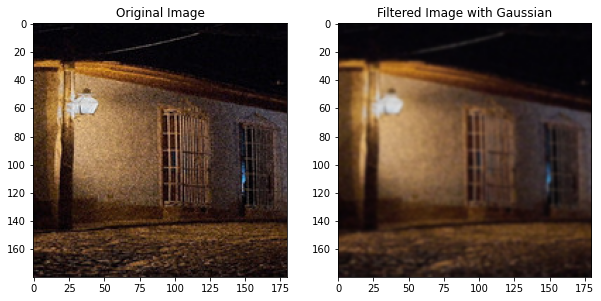

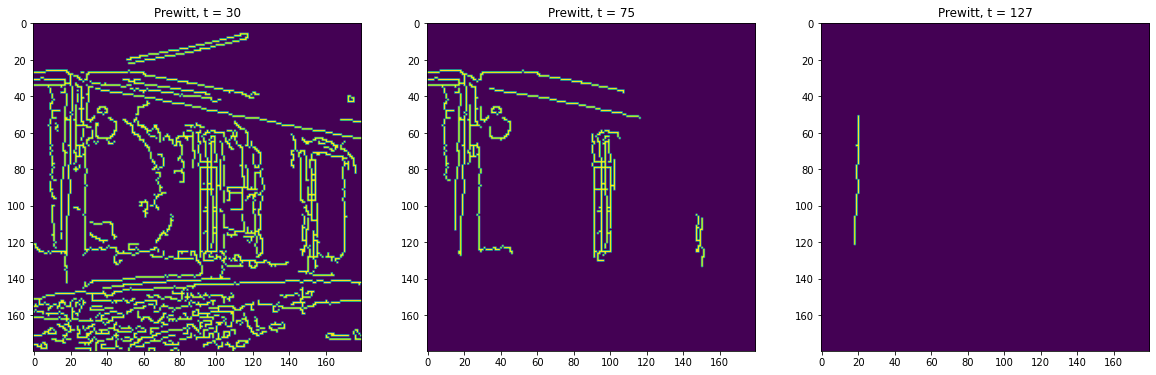

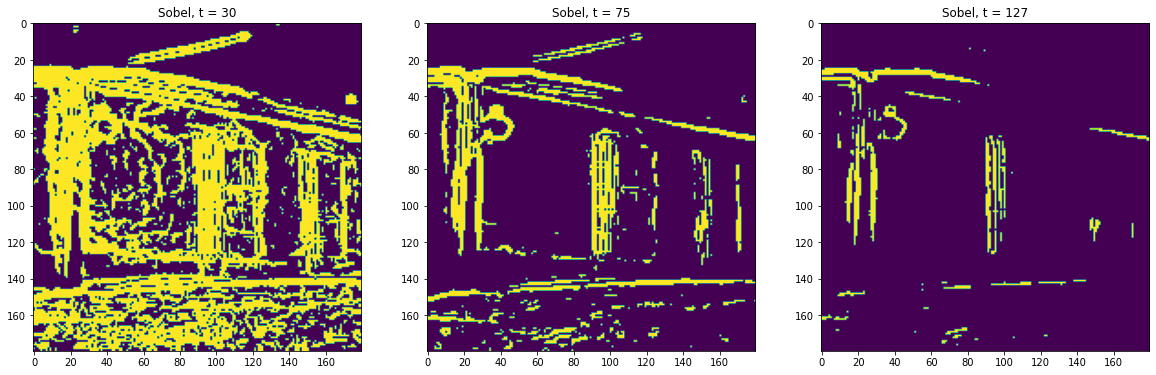

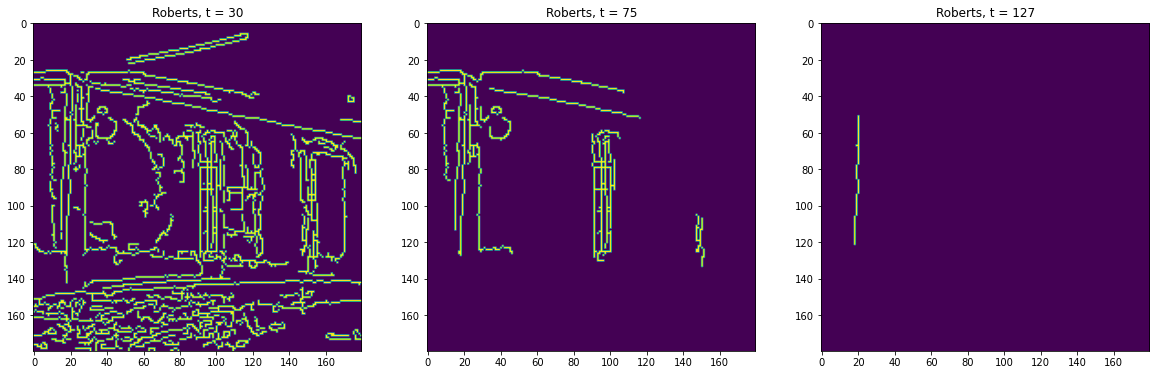

In [16]:
# Load the image
img = cv2.imread('./images/Ex2.jpg')

# Apply Gaussian filter to remove noise
filtered_img = cv2.GaussianBlur(img, (0, 0), sigmaX=1, sigmaY=1)

# Display the original and filtered images side by side
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Filtered Image with Gaussian')

# Convert the image to grayscale
img_gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

# Define the threshold values
t1 = 30
t2 = 75
t3 = 127

# Apply the Prewitt operator with three different threshold values
edge_p1 = cv2.Canny(img_gray, t1, t1*3, apertureSize=3)
edge_p2 = cv2.Canny(img_gray, t2, t2*3, apertureSize=3)
edge_p3 = cv2.Canny(img_gray, t3, t3*3, apertureSize=3)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(edge_p1)
axs[0].set_title('Prewitt, t = ' + str(t1))
axs[1].imshow(edge_p2)
axs[1].set_title('Prewitt, t = ' + str(t2))
axs[2].imshow(edge_p3)
axs[2].set_title('Prewitt, t = ' + str(t3))
plt.show()

# Apply the Sobel operator with three different threshold values
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
# Find magnitude and direction of gradients
mag, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)
# Apply threshold values
edge_s1 = cv2.threshold(mag, t1, 255, cv2.THRESH_BINARY)[1]
edge_s2 = cv2.threshold(mag, t2, 255, cv2.THRESH_BINARY)[1]
edge_s3 = cv2.threshold(mag, t3, 255, cv2.THRESH_BINARY)[1]

# # Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(edge_s1)
axs[0].set_title('Sobel, t = ' + str(t1))
axs[1].imshow(edge_s2)
axs[1].set_title('Sobel, t = ' + str(t2))
axs[2].imshow(edge_s3)
axs[2].set_title('Sobel, t = ' + str(t3))
plt.show()

# Apply the Roberts operator with three different threshold values
roberts_cross_v = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
roberts_cross_h = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)
edge_r1 = cv2.filter2D(img_gray, -1, roberts_cross_v) > t1
edge_r2 = cv2.filter2D(img_gray, -1, roberts_cross_v) > t2
edge_r3 = cv2.filter2D(img_gray, -1, roberts_cross_v) > t3

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(edge_p1)
axs[0].set_title('Roberts, t = ' + str(t1))
axs[1].imshow(edge_p2)
axs[1].set_title('Roberts, t = ' + str(t2))
axs[2].imshow(edge_p3)
axs[2].set_title('Roberts, t = ' + str(t3))
plt.show()


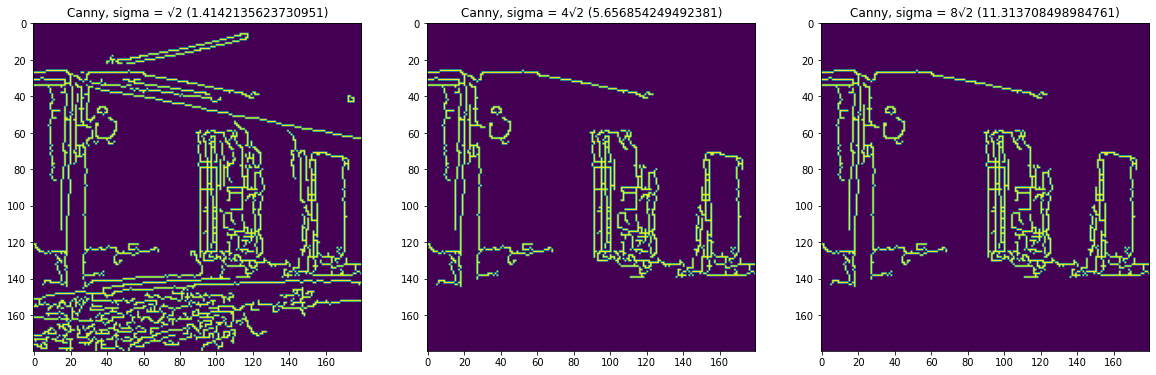

In [20]:
# c Áp dụng bộ dò cạnh Canny với ba độ lệch chuẩn khác nhau σ = √2, 4√2 và 8√2
def edge_detect_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

# Define the standard deviations
sigma1 = np.sqrt(2)
sigma2 = 4 * np.sqrt(2)
sigma3 = 8 * np.sqrt(2)
# Apply the Canny edge detector with three different standard deviations

# compute the median of the single channel pixel intensities
v = np.median(img_gray)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma1) * v))
upper = int(min(255, (1.0 + sigma1) * v))
edged = cv2.Canny(img_gray, lower, upper)


# Canny edge detection with sigma = sqrt(2)
edge_c1 = edge_detect_canny(img_gray, sigma1)
# Canny edge detection with sigma = 4*sqrt(2)
edge_c2 = edge_detect_canny(img_gray, sigma2)
# Canny edge detection with sigma = 8*sqrt(2)
edge_c3 = edge_detect_canny(img_gray, sigma3)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(edge_c1)
axs[0].set_title('Canny, sigma = √2 (' + str(sigma1) +')')
axs[1].imshow(edge_c2)
axs[1].set_title('Canny, sigma = 4√2 (' + str(sigma2)+')')
axs[2].imshow(edge_c3)
axs[2].set_title('Canny, sigma = 8√2 (' + str(sigma3)+')')
plt.show()

## 3. (15 điểm) - Ảnh màu (Color Image) và Ảnh nhị phân (Binary Image)
Cho ảnh màu JPG tên Ex3.jpg
Biến đổi ảnh trên thành ảnh nhị phân bằng 3 phương pháp: 
* ngưỡng thủ công (manual thresholding) </br>
* ngưỡng toàn cục (global thresholding) </br>
* ngưỡng cục bộ (local thresholding). </br>
 So sánh 3 phương pháp và hiển thị biểu đồ tần số.

PYTHON CODE

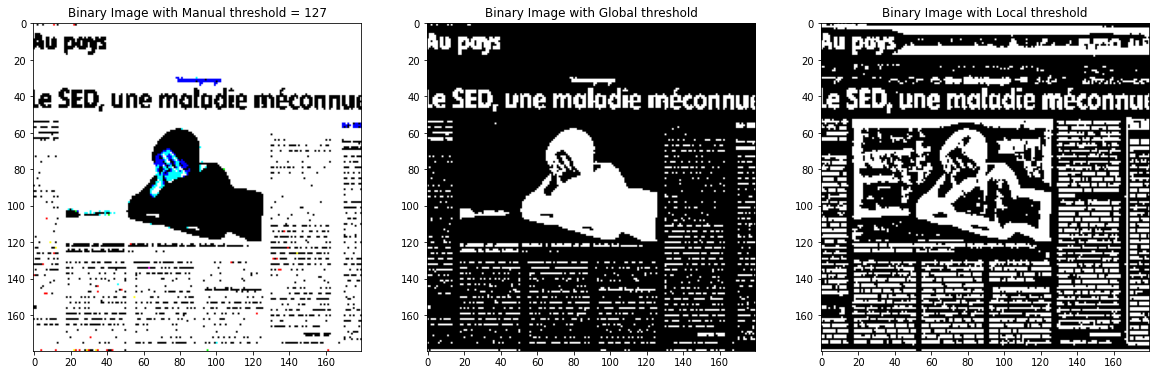

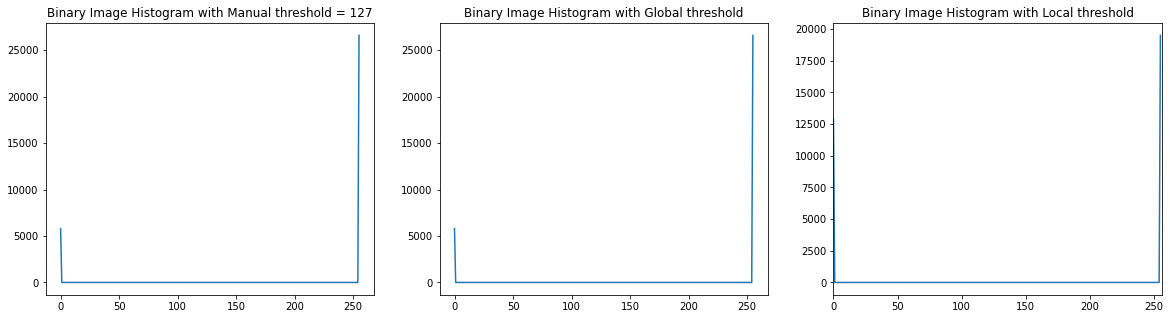

In [23]:
# load image
img = cv2.imread('./images/Ex3.jpg')
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use manual thresholding
# Choose a threshold value (between 0 and 255)
threshold_value = 127
# Apply thresholding with binary thresholding method
ret, _manual_binary_image = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
_manual_hist = cv2.calcHist([_manual_binary_image], [0], None, [256], [0, 256])

# threshold the image to convert it into binary
threshold_value, _global_binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Calculate histogram
_global_hist = cv2.calcHist([_global_binary_img], [0], None, [256], [0, 256])
# Apply local thresholding using adaptiveThreshold
block_size = 11
constant = 2
_local_binary_img = cv2.adaptiveThreshold(gray_img , 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
_local_hist = cv2.calcHist([_local_binary_img], [0], None, [256], [0, 256])
# Apply local thresholding using adaptiveThreshold

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(_manual_binary_image, cmap='binary')
axs[0].set_title('Binary Image with Manual threshold = 127')
axs[1].imshow(_global_binary_img, cmap='binary')
axs[1].set_title('Binary Image with Global threshold')
axs[2].imshow(_local_binary_img, cmap='binary')
axs[2].set_title('Binary Image with Local threshold')
plt.show()

fig, axs1 = plt.subplots(1, 3, figsize=(20, 5))
axs1[0].plot(_global_hist)
plt.xlim([0, 256])
axs1[0].set_title('Binary Image Histogram with Manual threshold = 127')
axs1[1].plot(_global_hist)
plt.xlim([0, 256])
axs1[1].set_title('Binary Image Histogram with Global threshold')
axs1[2].plot(_local_hist)
plt.xlim([0, 256])
axs1[2].set_title('Binary Image Histogram with Local threshold')
plt.show()

# Turn off axis for all subplots
for ax in axs.flat:
    ax.axis('off')

## 4. (10 điểm) – Phát hiện Vật thể (Object Detection) và Đánh dấu (Region Labelling)
Cho ảnh nhị phân JPG tên Ex4.jpg
Đổi màu các vật thể trong ảnh như sau: hình tròn (màu hồng), hình tam giác (màu tím), hình chữ nhật (màu cam), hình vuông (màu nâu). Hiển thị ảnh sau khi chỉnh.

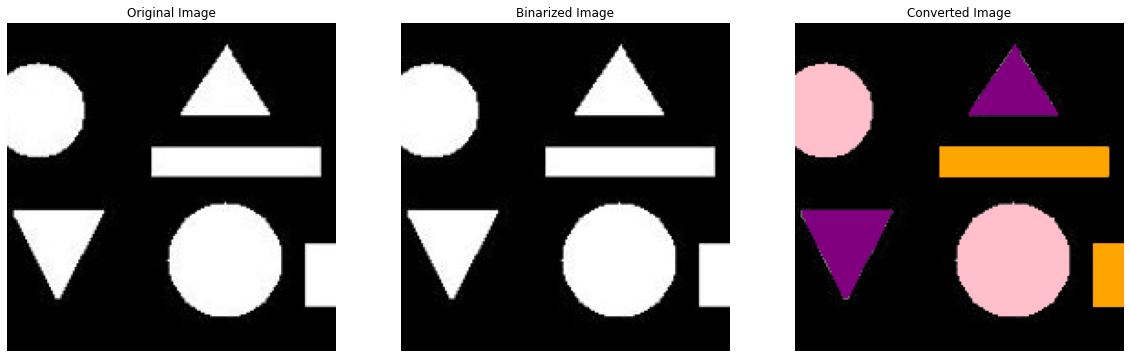

In [13]:
# Read the image
img = cv2.imread('./images/Ex4.jpg')

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the colors for each shape
pink = (255, 192, 203)
purple = (128, 0, 128)
orange = (255, 165, 0)
brown = (42, 42, 165)

# Fill each shape with the corresponding color
for contour in contours:
    # Determine the shape
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    shape = ""
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
            shape = "square"
        else:
            shape = "rectangle"
    else:
        shape = "circle"
    
    # Fill the shape with the corresponding color
    if shape == "triangle":
        cv2.drawContours(img, [contour], 0, purple, -1)
    elif shape == "rectangle":
        cv2.drawContours(img, [contour], 0, orange, -1)
    elif shape == "square":
        cv2.drawContours(img, [contour], 0, brown, -1)
    else:
        cv2.drawContours(img, [contour], 0, pink, -1)



axs[1].imshow(gray, cmap='gray')
axs[1].set_title('Binarized Image')
axs[1].axis('off')
axs[2].imshow(img)
axs[2].set_title('Converted Image')
axs[2].axis('off')
plt.show()

## 5. (15 điểm) – Điểm góc (Keypoint Detection)
Cho ảnh màu JPG tên Ex5.jpg </br>
(a) Sử dụng bộ phát hiện Harris hiển thị 400 điểm góc mạnh nhất của ảnh gốc. </br>
(b) Sử dụng bộ phát hiện Hessian hiển thị 300 điểm góc mạnh nhất của ảnh gốc. </br>
Trong cả hai trường hợp, sử dụng bộ lọc Sobel.

PYTHON CODE

Text(0.5, 1.0, '400 points')

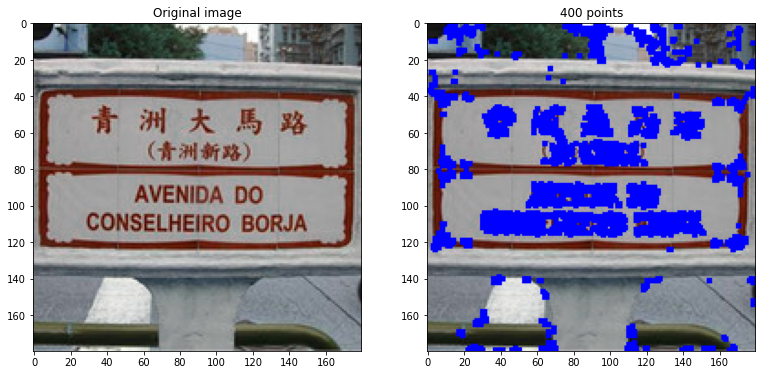

In [14]:
# a. Su dung bo phat hien Harris hien thi 400 diem goc manh nhat cua anh goc
# load the input image
img = cv2.imread('./images/Ex5.jpg')

# convert the input image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# modify the data type setting to 32-bit floating point
gray = np.float32(gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Compute x and y derivatives using Sobel operator
dx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(dx)
abs_grad_y = cv2.convertScaleAbs(dy)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# apply the cv2.cornerHarris method to detect the corners
corners = cv2.cornerHarris(grad, 2, 3, 0.05)

#result is dilated for marking the corners
corners = cv2.dilate(corners, None)

# Threshold for an optimal value.
img[corners > 0.01 * corners.max()]=[0, 0, 255]

# the window showing output image with corners
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.imread('./images/Ex5.jpg'))
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(img)
plt.title('400 points')

Text(0.5, 1.0, '400 points')

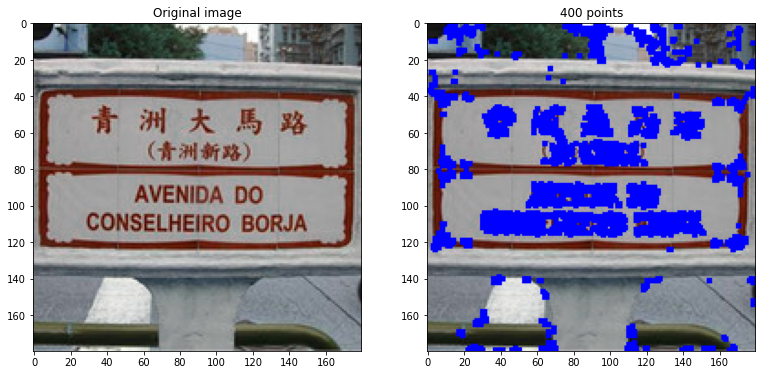

In [15]:
# b. Su dung bo phat hien Hessian hien thi 300 diem goc manh nhat cua anh goc
# load the input image
img = cv2.imread('./images/Ex5.jpg')

# convert the input image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# modify the data type setting to 32-bit floating point
gray = np.float32(gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Compute x and y derivatives using Sobel operator
dx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(dx)
abs_grad_y = cv2.convertScaleAbs(dy)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
# apply the cv2.cornerHarris method to detect the corners
corners = cv2.cornerHarris(grad, 2, 3, 0.05)

#result is dilated for marking the corners
corners = cv2.dilate(corners, None)

# Threshold for an optimal value.
img[corners > 0.01 * corners.max()]=[0, 0, 255]

# the window showing output image with corners
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.imread('./images/Ex5.jpg'))
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(img)
plt.title('400 points')